In [ ]:
import pandas as pd
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/28-Feb 2/Dataset

/content/drive/MyDrive/28-Feb 2/Dataset


In [ ]:
df=pd.read_csv("df_stp_words_lemmatised.csv")

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma
0,0,0,0,MORLY/E/2023/0000001,MORLY,To The Railway Board SDAH ER Location ...,To The Railway Board SDAH ER Location Madhyamg...,Railway Board SDAH ER Location Madhyamgram inf...,Railway Board SDAH ER Location Madhyamgram inf...
1,1,1,1,GOVUP/E/2023/0000001,GOVUP,"XAXPX/X/X0X2X4X0X0 REGARDING CBCID INSPECTION,...",REGARDING CBCID INSPECTION closed on wrong fac...,CBCID INSPECTION closed wrong facts investigat...,CBCID INSPECTION close wrong fact investigate ...
2,2,2,2,MOLBR/E/2023/0000001,MOLBR,Dear sir madam My name is RUDRARAM RAJU My P...,Dear sir madam My name is RUDRARAM RAJU My PF ...,Dear sir madam RUDRARAM RAJU PF number company...,dear sir madam RUDRARAM RAJU PF number company...
3,3,3,3,MOLBR/E/2023/0000002,MOLBR,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...
4,4,4,4,GOVUP/E/2023/0000002,GOVUP,"XAXPX/X/X0X2X4X0X8 REGARDING CBCID INSPECTION,...",REGARDING CBCID INSPECTION closed on wrong fac...,CBCID INSPECTION closed wrong facts investigat...,CBCID INSPECTION close wrong fact investigate ...
...,...,...,...,...,...,...,...,...,...
100717,100923,101613,101855,MOLBR/E/2023/0010863,MOLBR,I had applied to transfer my PF from Aecom Ind...,had applied to transfer my PF from Aecom India...,applied transfer PF Aecom India Pvt Ltd Bechte...,apply transfer PF Aecom India Pvt Ltd Bechtel ...
100718,100924,101614,101856,DPOST/E/2023/0004221,DPOST,"Respected sir, the shipment number X-X-X-X-X ...",Respected sir the shipment number is not yet d...,Respected sir shipment number delivered consig...,respected sir shipment number deliver consigne...
100719,100925,101615,101857,MOMAF/E/2023/0000235,MOMAF,"Respected sir, This is Mudasir Maqbool Najar ...",Respected sir This is Mudasir Maqbool Najar re...,Respected sir Mudasir Maqbool Najar research s...,respected sir Mudasir Maqbool Najar research s...
100720,100926,101616,101858,MOLBR/E/2023/0010864,MOLBR,"Dear Sir, Madam, RPFC ,Bellary is request t...",Dear Sir Madam RPFC Bellary is request to coor...,Dear Sir Madam RPFC Bellary request coordinate...,dear Sir Madam RPFC bellary request coordinate...


In [ ]:
df['cleaned_lemma'][0]

'Railway Board SDAH ER Location Madhyamgram inform temporary railway line cross near Madhyamgram station BT end bad condition stone line move far cause great danger yraincommon people train passenger time look matter say place fix'

In [ ]:
df['cleaned_lemma'][1]

'CBCID INSPECTION close wrong fact investigate evidence blame abuse complainant ASP NAGAR BULANDSHAHR anukriti SHARMA JI Mr TP Singh Superintending Post HPO Bulandshahr Mr Rajeev Umrao Postmaster General Agra investigate attach pdf file matter lodge FIR PRESENT COMPLAINANT want MENTAL HARASSMENT LEGAL action police officer POST HPO BULANDSHAHR SIR ATM card issued COMPLAINANT oral WRITTEN permission mr CHANDRA PRAKASH SINGH DISTRICT MAGISTRATE BULANDSHAHR date Choki Ansari Road Bulandshahr Mr Virendra Kumar SI pressure complainant lodge FIR date ASP Bulandshahr Shri Shashank Singh FALSE REPORTS phone testimony date phone testimony given date spite complaint cancelled BIG OFFENCE WRITTEN GD REGISTER kotwali NAGAR BULANDSHAHR ACTION TAKEN PERSONS till application receive date SP CITY BULANDSHAHR MR SURENDRA NATH TIWARI argue complainant miss crime PRESENT check fact blame complainant ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI report STIGRS SAVED officer action PERSONS present COMPLAINANT wa

In [ ]:
!pip install pandas matplotlib wordcloud

In [ ]:
df['org_code'].value_counts()

PMOPG    18873
MOLBR     9901
DEABD     6232
CBODT     6022
DOTEL     4186
         ...  
LEOR2        1
CGMUW        1
IRSEC        1
CBS01        1
RBSP6        1
Name: org_code, Length: 192, dtype: int64

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud_for_org_code(df, org_code):
    # Filter the dataframe by org_code
    filtered_df = df[df['org_code'] == org_code]

    # Combine all cleaned lemmas into a single string
    text = ' '.join(filtered_df['cleaned_lemma'].values)

    # Generate a word cloud image
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



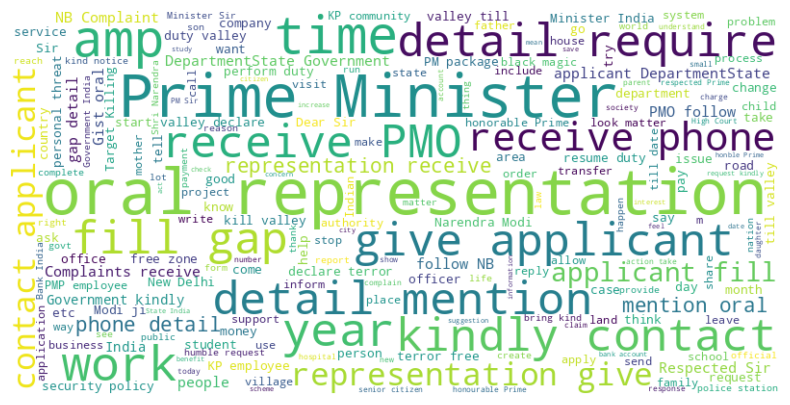

In [ ]:

# Example usage
generate_word_cloud_for_org_code(df, 'PMOPG')

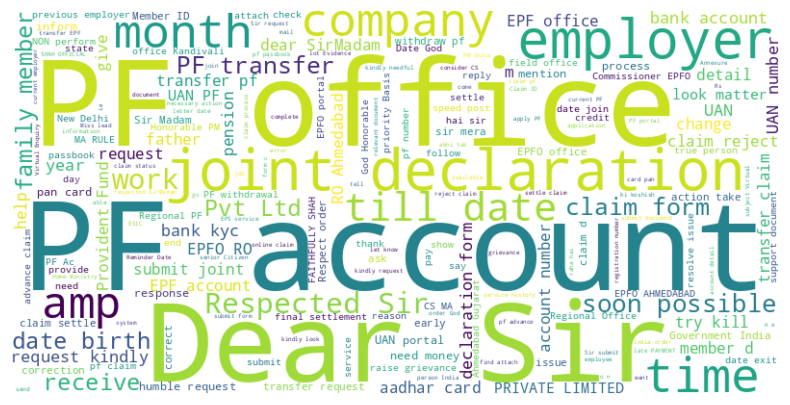

In [ ]:
generate_word_cloud_for_org_code(df, 'MOLBR')

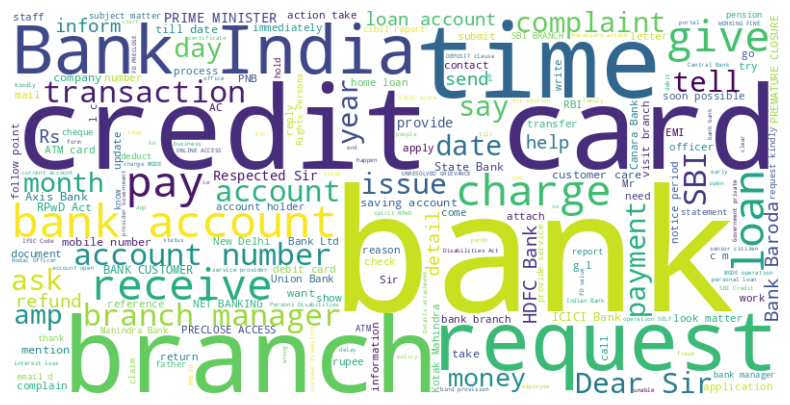

In [ ]:
generate_word_cloud_for_org_code(df, 'DEABD')

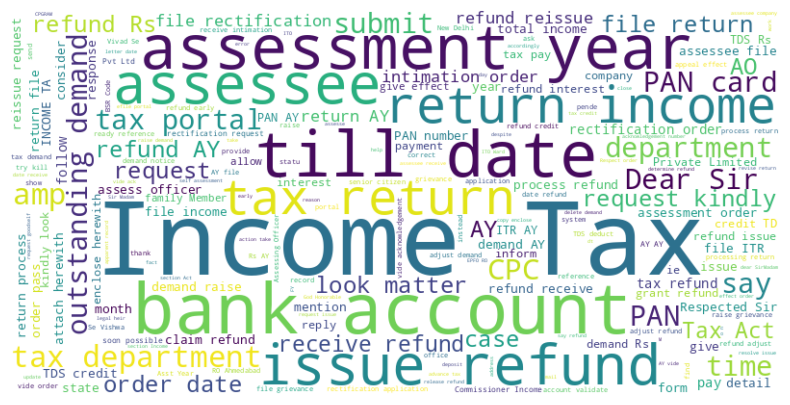

In [ ]:
generate_word_cloud_for_org_code(df, 'CBODT')

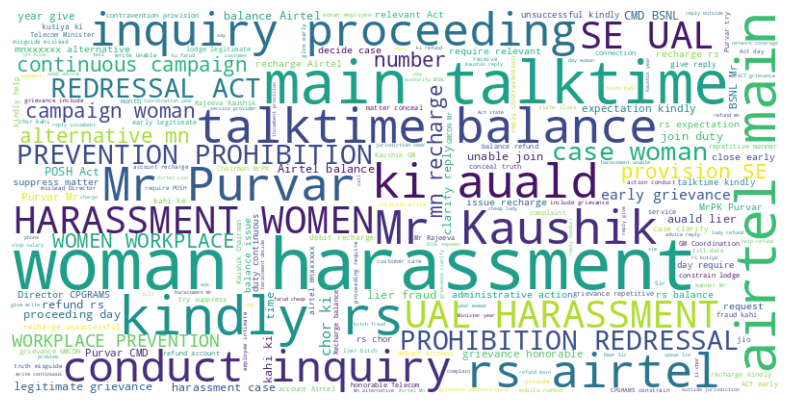

In [ ]:
generate_word_cloud_for_org_code(df, 'DOTEL')

In [ ]:
import pandas as pd
from collections import Counter

def get_popular_terms_by_org_code(df, org_code, n_terms=10):
    # Filter the DataFrame for the specified org_code
    filtered_df = df[df['org_code'] == org_code]

    # Concatenate all cleaned_lemma values into a single list
    words = ' '.join(filtered_df['cleaned_lemma'].tolist()).split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the most common n_terms words
    most_common_words = word_counts.most_common(n_terms)

    # Create a new DataFrame with these popular terms
    popular_terms_df = pd.DataFrame(most_common_words, columns=['Term', 'Frequency'])
    popular_terms_df['org_code'] = org_code  # Add a column with the org_code

    # Reordering DataFrame columns
    popular_terms_df = popular_terms_df[['org_code', 'Term', 'Frequency']]

    return popular_terms_df

def get_popular_terms_for_all_org_codes(df, n_terms=10):
    # Get a list of all unique org_codes
    org_codes = df['org_code'].unique()

    # Initialize an empty DataFrame to store results
    all_popular_terms_df = pd.DataFrame()

    # Iterate over each org_code and get the popular terms
    for org_code in org_codes:
        popular_terms_df = get_popular_terms_by_org_code(df, org_code, n_terms)
        all_popular_terms_df = pd.concat([all_popular_terms_df, popular_terms_df], ignore_index=True)

    return all_popular_terms_df




In [ ]:
# Example usage:
all_popular_terms_df = get_popular_terms_for_all_org_codes(df, n_terms=30)
print(all_popular_terms_df)

     org_code      Term  Frequency
0       MORLY     train       1484
1       MORLY   Railway       1093
2       MORLY   railway       1053
3       MORLY      date       1000
4       MORLY   request        877
...       ...       ...        ...
5039    SSCNP      till          2
5040    SSCNP   request          2
5041    SSCNP  instruct          2
5042    SSCNP   Central          2
5043    SSCNP    Record          2

[5044 rows x 3 columns]


In [ ]:
all_popular_terms_df.to_csv("common_terms_per_orgcode.csv")

In [ ]:
all_popular_terms_df["org_code"].value_counts()

MORLY    20
AGPS5    20
WRCCG    20
CAGAO    20
MCOAL    20
         ..
CGMBH     3
CS234     3
CERLY     2
IRSEC     1
LEOR2     1
Name: org_code, Length: 192, dtype: int64

In [ ]:
all_popular_terms_df["Term"].value_counts()

date       119
India      109
request     98
order       83
God         79
          ... 
ltd          1
MP           1
MLA          1
BOGUS        1
Jul          1
Name: Term, Length: 999, dtype: int64

In [ ]:
single_occurrences_df = df.groupby('org_code').filter(lambda x: len(x) == 1)

In [ ]:
single_occurrences_df.shape

(14, 9)

In [ ]:
single_occurrences_df['org_code']

4642     CBS01
4645     CGMUW
9102     CEAMP
19022    USRPK
31453    IRSEC
35147    LEOR2
48438    RBSP6
56173    GUJPC
59235    AKVPG
73114    RE1PG
73123    UDPCR
82567    CS123
82568    CS234
85481    DTEST
Name: org_code, dtype: object

In [ ]:
#ORG Codes removed from all_popular_terms_df

# SSCNP
# DTEST
# CS123
# CS234
# CERLY
# BPNLO
# BSF74
# CBS01
# CEAMP
# CGAT8
# CGMBH
# CGMUW
# CLC01
# CLC10
# DDGTM
# DL172
# DTDDG
# GUJPC
# IRSEC
# JJMIV
# JSOLD
# KN172
# LEOR2
# NERLY
# PRIW1
# RDRCD
# RDRC2
# RDRC3
# RE1PG
# SWRLY
# USRPK


In [ ]:
processed_df=pd.read_csv("common_terms_per_orgcode_preprocessed.csv")

In [ ]:
processed_df.dropna(inplace=True)

In [ ]:
processed_df

,Unnamed: 0,org_code,Term,Frequency
0,1308.0,AYUSH,Sir,10.0
1,1309.0,AYUSH,doctor,10.0
2,2194.0,MOSPI,India,10.0
3,2195.0,MOSPI,office,10.0
4,2197.0,MOSPI,officer,10.0
...,...,...,...,...
3136,60.0,MOLBR,PF,7416.0
3137,3009.0,PMOPG,India,7755.0
3138,3008.0,PMOPG,Sir,8035.0
3139,3007.0,PMOPG,request,8046.0


In [ ]:
processed_df["org_code"].value_counts()

DDESW    30
DMAFF    30
UIDAI    30
DPOST    30
DOAAC    29
         ..
KVSDL     1
SCRLY     1
CGDAN     1
CHQSO     1
MTNLD     1
Name: org_code, Length: 145, dtype: int64

In [ ]:
# Group by 'org_code' and concatenate 'Terms' into a single string for each 'org_code'
concatenated_keywords = processed_df.groupby('org_code')['Term'].apply(lambda x: ' '.join(x)).reset_index(name='Concatenated_Keywords')

print(concatenated_keywords)

    org_code                              Concatenated_Keywords
0      AGPS5  non revision Ex family FP Family Grant request...
1      ARNPG  provide problem issue till post Almora report ...
2      AYUSH  Sir doctor Research issue grievance Ayush stat...
3      CAGAO  Kumar Block complaint letter SCOPE Development...
4      CBODT  interest portal kindly attach pay credit recti...
..       ...                                                ...
140    PRIW2                                       reg transfer
141    PRSEC  permission President attachment INITIAL file i...
142    SCRLY                                            request
143    UIDAI  AADHAAR change apply updation birth mobile hel...
144    USIOC  petrol pump IOCL Kumar date necessary matter s...

[145 rows x 2 columns]


In [ ]:
text="To The Railway Board SDAH ER Location Madhyamgram further to informing you that the temporary railway line crossing near Madhyamgram station BT end is in a very bad condition The stones on the side of the line have been moved far enough to cause great danger to the yraincommon people and train passengers at any time Please look at the matter Although it was said that the place will be fixed but not done"

In [ ]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [ ]:
top_30_unigrams = get_top_n_bigram(df.cleaned_lemma,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df.cleaned_lemma,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df.cleaned_lemma,ngram=3, top=30)

In [ ]:
top_30_unigrams

[('date', 68654),
 ('sir', 52490),
 ('india', 50280),
 ('request', 45783),
 ('bank', 34728),
 ('kindly', 30557),
 ('god', 29615),
 ('order', 29585),
 ('account', 27466),
 ('time', 27378),
 ('action', 26878),
 ('year', 26682),
 ('government', 26242),
 ('office', 25220),
 ('issue', 24847),
 ('number', 24405),
 ('amp', 23953),
 ('receive', 23054),
 ('epfo', 22855),
 ('family', 22260),
 ('grievance', 21804),
 ('subject', 20735),
 ('person', 20695),
 ('pm', 20348),
 ('matter', 20084),
 ('till', 19533),
 ('company', 19300),
 ('complaint', 18950),
 ('refund', 18136),
 ('provide', 17896)]

In [ ]:
top_30_bigrams

[('till date', 9682),
 ('try kill', 9382),
 ('respected sir', 8592),
 ('dear sir', 8220),
 ('family members', 7704),
 ('government india', 7538),
 ('ro ahmedabad', 7516),
 ('epfo ro', 7188),
 ('new delhi', 7121),
 ('prime minister', 6948),
 ('family member', 6001),
 ('god honorable', 5996),
 ('respect order', 5855),
 ('date god', 5523),
 ('bank account', 5515),
 ('request kindly', 5482),
 ('commissioner epfo', 5468),
 ('income tax', 5338),
 ('honorable pm', 5199),
 ('pm india', 5125),
 ('humble request', 4933),
 ('ahmedabad gujarat', 4880),
 ('true person', 4863),
 ('oral representation', 4775),
 ('ki koshish', 4697),
 ('senior citizen', 4569),
 ('virtual enquiry', 4520),
 ('miss lead', 4288),
 ('home ministry', 4263),
 ('reminder date', 4153)]

In [ ]:
top_30_trigrams

[('epfo ro ahmedabad', 6358),
 ('honorable pm india', 4979),
 ('commissioner epfo ro', 4799),
 ('ro ahmedabad gujarat', 4695),
 ('god honorable pm', 4659),
 ('subject virtual enquiry', 4133),
 ('india order god', 3976),
 ('true person india', 3860),
 ('person india lot', 3556),
 ('maarne ki koshish', 3512),
 ('india lot evidence', 3470),
 ('try kill ghaziabad', 3395),
 ('jaan se maarne', 3359),
 ('se maarne ki', 3335),
 ('cbi ib nia', 3304),
 ('respect god honorable', 3183),
 ('shri abhishek ranjan', 3103),
 ('abhishek ranjan ji', 3103),
 ('ranjan ji commissioner', 3101),
 ('ji commissioner epfo', 3101),
 ('god shri abhishek', 3100),
 ('ahmedabad gujarat subject', 3065),
 ('senior citizen mother', 2994),
 ('date god shri', 2977),
 ('agrawal roadlines pvt', 2973),
 ('daughter family members', 2953),
 ('poor brahaman family', 2854),
 ('ref diary order', 2832),
 ('reminder date god', 2794),
 ('urgent reminder date', 2680)]

In [ ]:
top_30_unigrams = get_top_n_bigram(concatenated_keywords.Concatenated_Keywords,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(concatenated_keywords.Concatenated_Keywords,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(concatenated_keywords.Concatenated_Keywords,ngram=3, top=30)

In [ ]:
top_30_unigrams

[('date', 179),
 ('india', 155),
 ('sir', 98),
 ('request', 90),
 ('order', 84),
 ('god', 80),
 ('government', 72),
 ('kindly', 72),
 ('epfo', 72),
 ('family', 68),
 ('action', 59),
 ('pm', 55),
 ('subject', 52),
 ('issue', 48),
 ('establishment', 48),
 ('fir', 46),
 ('ro', 38),
 ('time', 36),
 ('kill', 36),
 ('office', 29),
 ('ministry', 28),
 ('lord', 28),
 ('members', 28),
 ('number', 25),
 ('complaint', 25),
 ('ahmedabad', 24),
 ('work', 24),
 ('day', 23),
 ('enquiry', 23),
 ('provide', 22)]

In [ ]:
top_30_bigrams

[('date order', 22),
 ('epfo god', 20),
 ('india epfo', 19),
 ('date date', 17),
 ('order date', 16),
 ('india god', 16),
 ('date india', 14),
 ('order india', 14),
 ('order epfo', 13),
 ('epfo india', 12),
 ('india date', 12),
 ('date epfo', 12),
 ('date god', 11),
 ('pm date', 11),
 ('india order', 10),
 ('epfo date', 9),
 ('establishment date', 9),
 ('kill members', 9),
 ('establishment pm', 8),
 ('date request', 7),
 ('sir date', 7),
 ('sir request', 7),
 ('kindly india', 7),
 ('lord establishment', 7),
 ('family date', 7),
 ('government date', 7),
 ('request date', 6),
 ('order lord', 6),
 ('government family', 6),
 ('family india', 6)]

In [ ]:
top_30_trigrams

[('india epfo god', 13),
 ('date date india', 7),
 ('epfo india god', 6),
 ('date date order', 6),
 ('order india epfo', 6),
 ('date order lord', 5),
 ('date india god', 5),
 ('india family company', 5),
 ('order date god', 4),
 ('order date date', 4),
 ('date order india', 4),
 ('order epfo india', 4),
 ('date epfo india', 4),
 ('government family date', 4),
 ('family date date', 4),
 ('date order date', 4),
 ('order lord india', 4),
 ('lord india epfo', 4),
 ('kill members respect', 4),
 ('members respect lead', 4),
 ('date lord establishment', 4),
 ('lord establishment order', 4),
 ('epfo india date', 3),
 ('india date god', 3),
 ('epfo order date', 3),
 ('epfo date order', 3),
 ('order epfo date', 3),
 ('pm date fir', 3),
 ('date india epfo', 3),
 ('establishment pm date', 3)]

In [ ]:
#Write your code here to initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [ ]:
dtm = tfidf.fit_transform(concatenated_keywords.Concatenated_Keywords)

In [ ]:
tfidf.get_feature_names_out()[:10]

array(['aadhar', 'account', 'act', 'action', 'address', 'admission', 'ag',
       'ahmedabad', 'air', 'applicant'], dtype=object)

In [ ]:
len(tfidf.get_feature_names_out())

219

In [ ]:
from sklearn.decomposition import NMF


In [ ]:
#Load your nmf_model with the n_components i.e 5
num_topics =  145

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [ ]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [ ]:
vocab

array(['aadhar', 'account', 'act', 'action', 'address', 'admission', 'ag',
       'ahmedabad', 'air', 'applicant', 'application', 'apply', 'area',
       'army', 'arrear', 'attach', 'attachment', 'authority', 'bank',
       'bharat', 'board', 'book', 'branch', 'card', 'care', 'case',
       'cash', 'caste', 'cbi', 'central', 'certificate', 'change',
       'chapter', 'charge', 'citizen', 'claim', 'commission',
       'commissioner', 'company', 'complainant', 'complaint',
       'connection', 'copy', 'court', 'credit', 'customer', 'date', 'day',
       'delhi', 'deliver', 'delivery', 'department', 'desh', 'diesel',
       'disability', 'dispose', 'district', 'doctor', 'document', 'dr',
       'early', 'education', 'email', 'employee', 'energy', 'enquiry',
       'epf', 'epfo', 'establishment', 'evidence', 'exam', 'family',
       'fee', 'file', 'fir', 'follow', 'food', 'form', 'goa', 'god',
       'government', 'govt', 'gram', 'grant', 'grievance', 'gst',
       'gujarat', 'health', 'he

In [ ]:
topics

['honorable ministry kill ahmedabad ro fir establishment subject pm members india order date family epfo',
 'mp police help case land work complaint office time date fir issue action family sir',
 'pension action issue office rule attach rs president energy department service record sparsh received pcda',
 'education house village district state help road land day work issue action family government kindly',
 'lead company respect bharat lord members india date kill establishment pm family government kindly order',
 'standard railway home medical service ministry enquiry government kill action ro family date kindly fir',
 'complainant minister official money fir pm action government family epfo order ro subject ministry evidence',
 'provision shall disability rpwd follow email court act card submit delhi account case service bank',
 'singh village land number record status pm district document account receive sir date request subject',
 'request ministry government kindly family india 

In [ ]:
colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(concatenated_keywords.Concatenated_Keywords))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic136,Topic137,Topic138,Topic139,Topic140,Topic141,Topic142,Topic143,Topic144,dominant_topic
Doc0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,27
Doc1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,124
Doc2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.02,0.0,142
Doc3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,56
Doc4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,37


In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column
concatenated_keywords['Topic'] = significant_topic

In [ ]:
concatenated_keywords

,org_code,Concatenated_Keywords,Topic
0,AGPS5,non revision Ex family FP Family Grant request...,27
1,ARNPG,provide problem issue till post Almora report ...,124
2,AYUSH,Sir doctor Research issue grievance Ayush stat...,142
3,CAGAO,Kumar Block complaint letter SCOPE Development...,56
4,CBODT,interest portal kindly attach pay credit recti...,37
...,...,...,...
140,PRIW2,reg transfer,14
141,PRSEC,permission President attachment INITIAL file i...,26
142,SCRLY,request,9
143,UIDAI,AADHAAR change apply updation birth mobile hel...,50


In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
temp =concatenated_keywords[['Concatenated_Keywords','org_code','Topic']].groupby('Topic').head(10)
temp.sort_values('Topic')

,Concatenated_Keywords,org_code,Topic
135,MTNL,MTNLD,0
106,KV,KVSDL,0
92,land Madhya MP police time case office issue Date FIR EPFO action Sir help date family India order work complaint God request,GOVMP,1
139,pension,POLII,2
7,pension,CGDAN,2
...,...,...,...
41,IFD case DOE note UO receive state arrear recovery EG provision Para JUSTICE matter authority CAG OM examine EV public subscription vide CGEGIS grievance Branch,DOEXP,141
20,Grievance lodge,DEACM,142
2,Sir doctor Research issue grievance Ayush state Central Council date request National India PCIMH kindly provide Ministry ayush,AYUSH,142
116,register provide scheme tender mention kindly number letter attach time office pay complaint work payment day Sir India give order loan company action account date request MSME,MMSME,143


In [ ]:
concatenated_keywords['Topic'].value_counts()

128    12
68     10
138    9 
9      6 
111    6 
      .. 
29     1 
105    1 
141    1 
96     1 
48     1 
Name: Topic, Length: 95, dtype: int64

In [ ]:
# Group by 'Topic' and concatenate 'org_code' into a single string for each 'Topic'
topic_org_dict = concatenated_keywords.groupby('Topic')['org_code'].apply(lambda x: ' '.join(x.unique())).to_dict()

print(topic_org_dict)

{0: 'KVSDL MTNLD', 1: 'GOVMP', 2: 'CGDAN POLII', 3: 'GOVOR', 4: 'GOVMN GOVNL GOVSK', 5: 'DHRES', 6: 'GOVUP', 7: 'DEPOJ', 8: 'DOAAC', 9: 'CHQSO DEAID DORLD GOVJK MINIT SCRLY', 10: 'GOVTG', 12: 'GOVKL', 13: 'MOEAF', 14: 'CMASM PRIW2', 15: 'MPANG', 18: 'MOSPI', 19: 'DPHAM', 20: 'DOSKD', 21: 'GOVHY', 24: 'DPUBE', 25: 'DDRDO', 26: 'PRSEC', 27: 'AGPS5', 28: 'CGATP', 29: 'DOIPP', 33: 'DOSEL', 34: 'MINWR', 37: 'CBODT', 39: 'DMAFF', 40: 'GOVMH', 43: 'PMOPG', 44: 'MEAPD', 46: 'DCLTR', 48: 'USIOC', 49: 'DPOST', 50: 'UIDAI', 51: 'MOMAF', 54: 'DCOYA', 56: 'CAGAO', 61: 'DDPRO', 62: 'CMPFO', 68: 'DOSIR DOWCD GOVAN GOVBH GOVCH GOVDD GOVHP GOVLD MINPA MTXTL', 69: 'DATOM', 74: 'GOVDN', 78: 'MORLY', 81: 'MPOWR', 84: 'DEAPR', 85: 'GOVAR', 90: 'DOPAT', 94: 'LGVED', 95: 'MONRE', 96: 'DODWS', 97: 'DSPAC', 98: 'GNCTD', 100: 'MOCAV', 101: 'FADSS', 102: 'MOCOP', 103: 'DDESW', 105: 'DOFPD', 107: 'GOVTN', 108: 'DOAHD', 109: 'DSPRT', 110: 'MODEF', 111: 'DEABD DOCAF DOEAF DOPPW DOURD GOVMG', 112: 'DTOUR', 113: 'DSE

In [ ]:
topic_mapping=topic_org_dict

In [ ]:
concatenated_keywords['Topic_name'] = concatenated_keywords['Topic'].map(topic_mapping)

In [ ]:
concatenated_keywords.head()

,org_code,Concatenated_Keywords,Topic,Topic_name
0,AGPS5,non revision Ex family FP Family Grant request Pension respect pension Records,27,AGPS5
1,ARNPG,provide problem issue till post Almora report member care naik live parson dacument help CITIZEN number road request poor people time village officer complete family government benifit sir,124,ARNPG DHIND
2,AYUSH,Sir doctor Research issue grievance Ayush state Central Council date request National India PCIMH kindly provide Ministry ayush,142,AYUSH DEACM
3,CAGAO,Kumar Block complaint letter SCOPE Development submit Husband give Sir provide send Office New Delhi matter action case Govt issue AG pension request date office project,56,CAGAO
4,CBODT,interest portal kindly attach pay credit rectification CPC process account Rs assessee TDS receive Tax Income issue return income PAN order request tax date file demand AY refund,37,CBODT


<Axes: xlabel='Topic', ylabel='count'>

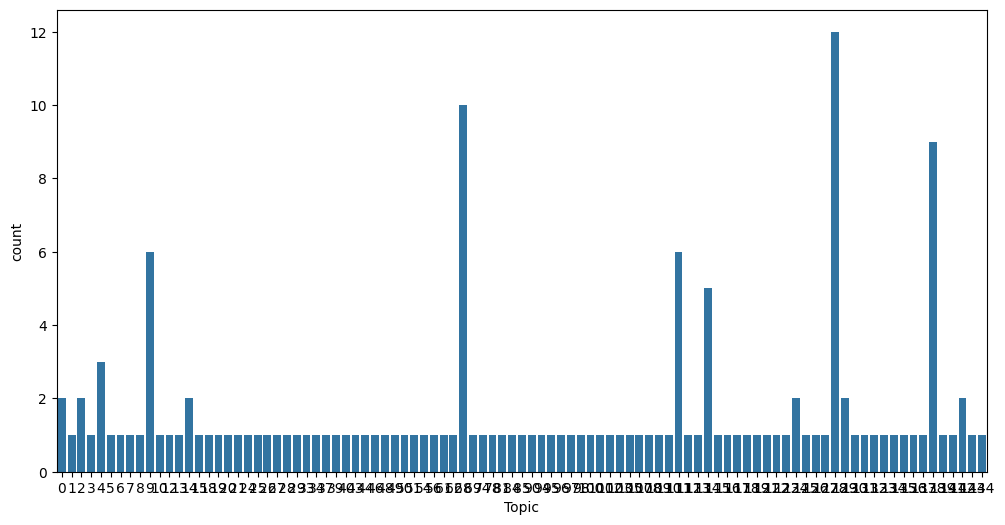

In [ ]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=concatenated_keywords)

In [ ]:
training_data = concatenated_keywords[['Concatenated_Keywords','Topic_name']]

In [ ]:
training_data.head()

,Concatenated_Keywords,Topic_name
0,non revision Ex family FP Family Grant request Pension respect pension Records,AGPS5
1,provide problem issue till post Almora report member care naik live parson dacument help CITIZEN number road request poor people time village officer complete family government benifit sir,ARNPG DHIND
2,Sir doctor Research issue grievance Ayush state Central Council date request National India PCIMH kindly provide Ministry ayush,AYUSH DEACM
3,Kumar Block complaint letter SCOPE Development submit Husband give Sir provide send Office New Delhi matter action case Govt issue AG pension request date office project,CAGAO
4,interest portal kindly attach pay credit rectification CPC process account Rs assessee TDS receive Tax Income issue return income PAN order request tax date file demand AY refund,CBODT


In [ ]:
# Initialize an empty dictionary to hold the swapped key-value pairs
org_topic_dict = {}

# Iterate over each key-value pair in the original dictionary
for topic, org_codes_str in topic_org_dict.items():
    # Split the concatenated org_code string into individual org_codes
    org_code = org_codes_str

    # for org_code in org_codes:
    #     # If the org_code is already a key, append the topic to its list of topics
    if org_code in org_topic_dict:
        # Ensure the value is a list and append the new topic
        if isinstance(org_topic_dict[org_code], list):
            org_topic_dict[org_code].append(topic)
        else:
            org_topic_dict[org_code] = [org_topic_dict[org_code], topic]
    else:
        # Otherwise, create a new key-value pair with the org_code as the key
        # and the topic as its value
        org_topic_dict[org_code] = topic

# Convert lists of a single item to just the item, for consistency
for org_code in org_topic_dict:
    if isinstance(org_topic_dict[org_code], list) and len(org_topic_dict[org_code]) == 1:
        org_topic_dict[org_code] = org_topic_dict[org_code][0]

print(org_topic_dict)

{'KVSDL MTNLD': 0, 'GOVMP': 1, 'CGDAN POLII': 2, 'GOVOR': 3, 'GOVMN GOVNL GOVSK': 4, 'DHRES': 5, 'GOVUP': 6, 'DEPOJ': 7, 'DOAAC': 8, 'CHQSO DEAID DORLD GOVJK MINIT SCRLY': 9, 'GOVTG': 10, 'GOVKL': 12, 'MOEAF': 13, 'CMASM PRIW2': 14, 'MPANG': 15, 'MOSPI': 18, 'DPHAM': 19, 'DOSKD': 20, 'GOVHY': 21, 'DPUBE': 24, 'DDRDO': 25, 'PRSEC': 26, 'AGPS5': 27, 'CGATP': 28, 'DOIPP': 29, 'DOSEL': 33, 'MINWR': 34, 'CBODT': 37, 'DMAFF': 39, 'GOVMH': 40, 'PMOPG': 43, 'MEAPD': 44, 'DCLTR': 46, 'USIOC': 48, 'DPOST': 49, 'UIDAI': 50, 'MOMAF': 51, 'DCOYA': 54, 'CAGAO': 56, 'DDPRO': 61, 'CMPFO': 62, 'DOSIR DOWCD GOVAN GOVBH GOVCH GOVDD GOVHP GOVLD MINPA MTXTL': 68, 'DATOM': 69, 'GOVDN': 74, 'MORLY': 78, 'MPOWR': 81, 'DEAPR': 84, 'GOVAR': 85, 'DOPAT': 90, 'LGVED': 94, 'MONRE': 95, 'DODWS': 96, 'DSPAC': 97, 'GNCTD': 98, 'MOCAV': 100, 'FADSS': 101, 'MOCOP': 102, 'DDESW': 103, 'DOFPD': 105, 'GOVTN': 107, 'DOAHD': 108, 'DSPRT': 109, 'MODEF': 110, 'DEABD DOCAF DOEAF DOPPW DOURD GOVMG': 111, 'DTOUR': 112, 'DSEHE': 

In [ ]:
# reverse_topic_mapping = org_topic_dict
# #Replace Topics with Topic Names
# training_data['Topic_name'] = training_data['Topic_name'].map(reverse_topic_mapping)
training_data.shape

(145, 2)

In [ ]:
# X - y  split

X = training_data.Concatenated_Keywords
y = training_data.Topic_name

In [ ]:
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [ ]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
y.value_counts()

CBOEC DOCND DOFPI DOFZR GOVCC GOVGO GOVJH GOVTR GOVWB MMINE MOIAB MTRBL    12
DOSIR DOWCD GOVAN GOVBH GOVCH GOVDD GOVHP GOVLD MINPA MTXTL                10
DLGLA DOCOM DONER DOSAT DPLNG GOVLK MINHA MOSTL MSHPG                      9 
CHQSO DEAID DORLD GOVJK MINIT SCRLY                                        6 
DEABD DOCAF DOEAF DOPPW DOURD GOVMG                                        6 
                                                                          .. 
DOIPP                                                                      1 
DOFPD                                                                      1 
DOEXP                                                                      1 
DODWS                                                                      1 
USIOC                                                                      1 
Name: Topic_name, Length: 95, dtype: int64

In [ ]:
X.value_counts()

kill Members Respect lead india family Company kindly Bharat PM date Government Date Lord Establishment order India EPFO God                                                                      2
pension                                                                                                                                                                                           2
request                                                                                                                                                                                           2
non revision Ex family FP Family Grant request Pension respect pension Records                                                                                                                    1
near Subject matter area provide give work police EPFO Jaipur road issue order family India action kindly time department God Sir complaint cover break date line Rajasthan request               1
                    

In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma
0,0,0,0,MORLY/E/2023/0000001,MORLY,"To The Railway Board SDAH ER Location Madhyamgram I further to informing you that the temporary railway line crossing near Madhyamgram station BT end. is in a very bad condition. The stones on the side of the line have been moved far enough to cause great danger to the yrain,common people and train passengers at any time. Please look at the matter. Although it was said that the place will be fixed but not done! Thanking you Yours truly Bhaskar Mitra 1.1.2023",To The Railway Board SDAH ER Location Madhyamgram further to informing you that the temporary railway line crossing near Madhyamgram station BT end is in a very bad condition The stones on the side of the line have been moved far enough to cause great danger to the yraincommon people and train passengers at any time Please look at the matter Although it was said that the place will be fixed but not done,Railway Board SDAH ER Location Madhyamgram informing temporary railway line crossing near Madhyamgram station BT end bad condition stones line moved far cause great danger yraincommon people train passengers time look matter said place fixed,Railway Board SDAH ER Location Madhyamgram inform temporary railway line cross near Madhyamgram station BT end bad condition stone line move far cause great danger yraincommon people train passenger time look matter say place fix
1,1,1,1,GOVUP/E/2023/0000001,GOVUP,"XAXPX/X/X0X2X4X0X0 REGARDING CBCID INSPECTION, closed on wrong facts, without investigate, evidence and blamed, abused to the complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI, Mr. T.P. Singh Superintending of Post H.P.O. Bulandshahr and Mr. Rajeev Umrao Postmaster General Agra. Please investigate attached pdf file matter and lodge a FIR in it. IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT XOXPXNXAXIXN AND A LEGAL ACTION ON ABOVE POLICE OFFICERS, XUXEXIXTXNXIXG OF POST HPO BULANDSHAHR. SIR, ATM CARD ISSUED WITHOUT COMPLAINANT ORAL AND WRITTEN PERMISSION BY MR. CHANDRA PRAKASH SINGH, DISTRICT MAGISTRATE BULANDSHAHR ON DATED 19.9.2022 AS WELL AS Choki Ansari Road Bulandshahr Mr. Virendra Kumar SI X8X1X6X9X4X MADE PRESSURE ON COMPLAINANT NOT TO LODGE A FIR DATED 28.06.2022 AND ASP Bulandshahr Shri Shashank Singh No. X4X4X0X5X2 FALSE REPORTS REGARDING PHONE TESTIMONY DATED 22.2.2022 IN WHICH ANY PHONE TESTIMONY HAD NOT GIVEN ON ABOVE DATE IN SPITE OF THAT MANY COMPLAINTS HAD CANCELLED THAT WAS A BIG OFFENCE. AS WELL AS XOXPXAXNXNXS NAME HAD WRITTEN IN G.D. REGISTER AT KOTWALI NAGAR BULANDSHAHR ON 22.7.2022 BUT ACTION NOT TAKEN ON ABOVE PERSONS TILL NOW. AS WELL AS application had not been received on dated 08.04.2022 by SP CITY BULANDSHAHR MR. SURENDRA NATH TIWARI No. X4X4X0X0X3 as well as argued to the complainant that missed call is not a crime. IN PRESENT, without check the above facts, blamed to complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI through report ST.IGRS1.X2X3X.X0X2X2X and SAVED TO ABOVE OFFICERS WITHOUT ANY ACTION ON ABOVE PERSONS. IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT XOXPXNXAXIXN AND A LEGAL ACTION ON ABOVE POLICE OFFICERS, XUXEXIXTXNXIXG OF POST HPO BULANDSHAHR.",REGARDING CBCID INSPECTION closed on wrong facts without investigate evidence and blamed abused to the complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI Mr TP Singh Superintending of Post HPO Bulandshahr and Mr Rajeev Umrao Postmaster General Agra Please investigate attached pdf file matter and lodge a FIR in it IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT AND LEGAL ACTION ON ABOVE POLICE OFFICERS OF POST HPO BULANDSHAHR SIR ATM CARD ISSUED WITHOUT COMPLAINANT ORAL AND WRITTEN PERMISSION BY MR CHANDRA PRAKASH SINGH DISTRICT MAGISTRATE BULANDSHAHR ON DATED AS WELL AS Choki Ansari Road Bulandshahr Mr Virendra Kumar SI MADE PRESSURE ON COMPLAINANT NOT TO LODGE FIR DATED AND ASP Bulandshahr Shri Shashank Singh No F

In [ ]:
concatenated_keywords.shape

(145, 4)

In [ ]:
concatenated_keywords.head()

,org_code,Concatenated_Keywords,Topic,Topic_name
0,AGPS5,non revision Ex family FP Family Grant request Pension respect pension Records,27,AGPS5
1,ARNPG,provide problem issue till post Almora report member care naik live parson dacument help CITIZEN number road request poor people time village officer complete family government benifit sir,124,ARNPG DHIND
2,AYUSH,Sir doctor Research issue grievance Ayush state Central Council date request National India PCIMH kindly provide Ministry ayush,142,AYUSH DEACM
3,CAGAO,Kumar Block complaint letter SCOPE Development submit Husband give Sir provide send Office New Delhi matter action case Govt issue AG pension request date office project,56,CAGAO
4,CBODT,interest portal kindly attach pay credit rectification CPC process account Rs assessee TDS receive Tax Income issue return income PAN order request tax date file demand AY refund,37,CBODT


In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma
0,0,0,0,MORLY/E/2023/0000001,MORLY,"To The Railway Board SDAH ER Location Madhyamgram I further to informing you that the temporary railway line crossing near Madhyamgram station BT end. is in a very bad condition. The stones on the side of the line have been moved far enough to cause great danger to the yrain,common people and train passengers at any time. Please look at the matter. Although it was said that the place will be fixed but not done! Thanking you Yours truly Bhaskar Mitra 1.1.2023",To The Railway Board SDAH ER Location Madhyamgram further to informing you that the temporary railway line crossing near Madhyamgram station BT end is in a very bad condition The stones on the side of the line have been moved far enough to cause great danger to the yraincommon people and train passengers at any time Please look at the matter Although it was said that the place will be fixed but not done,Railway Board SDAH ER Location Madhyamgram informing temporary railway line crossing near Madhyamgram station BT end bad condition stones line moved far cause great danger yraincommon people train passengers time look matter said place fixed,Railway Board SDAH ER Location Madhyamgram inform temporary railway line cross near Madhyamgram station BT end bad condition stone line move far cause great danger yraincommon people train passenger time look matter say place fix
1,1,1,1,GOVUP/E/2023/0000001,GOVUP,"XAXPX/X/X0X2X4X0X0 REGARDING CBCID INSPECTION, closed on wrong facts, without investigate, evidence and blamed, abused to the complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI, Mr. T.P. Singh Superintending of Post H.P.O. Bulandshahr and Mr. Rajeev Umrao Postmaster General Agra. Please investigate attached pdf file matter and lodge a FIR in it. IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT XOXPXNXAXIXN AND A LEGAL ACTION ON ABOVE POLICE OFFICERS, XUXEXIXTXNXIXG OF POST HPO BULANDSHAHR. SIR, ATM CARD ISSUED WITHOUT COMPLAINANT ORAL AND WRITTEN PERMISSION BY MR. CHANDRA PRAKASH SINGH, DISTRICT MAGISTRATE BULANDSHAHR ON DATED 19.9.2022 AS WELL AS Choki Ansari Road Bulandshahr Mr. Virendra Kumar SI X8X1X6X9X4X MADE PRESSURE ON COMPLAINANT NOT TO LODGE A FIR DATED 28.06.2022 AND ASP Bulandshahr Shri Shashank Singh No. X4X4X0X5X2 FALSE REPORTS REGARDING PHONE TESTIMONY DATED 22.2.2022 IN WHICH ANY PHONE TESTIMONY HAD NOT GIVEN ON ABOVE DATE IN SPITE OF THAT MANY COMPLAINTS HAD CANCELLED THAT WAS A BIG OFFENCE. AS WELL AS XOXPXAXNXNXS NAME HAD WRITTEN IN G.D. REGISTER AT KOTWALI NAGAR BULANDSHAHR ON 22.7.2022 BUT ACTION NOT TAKEN ON ABOVE PERSONS TILL NOW. AS WELL AS application had not been received on dated 08.04.2022 by SP CITY BULANDSHAHR MR. SURENDRA NATH TIWARI No. X4X4X0X0X3 as well as argued to the complainant that missed call is not a crime. IN PRESENT, without check the above facts, blamed to complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI through report ST.IGRS1.X2X3X.X0X2X2X and SAVED TO ABOVE OFFICERS WITHOUT ANY ACTION ON ABOVE PERSONS. IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT XOXPXNXAXIXN AND A LEGAL ACTION ON ABOVE POLICE OFFICERS, XUXEXIXTXNXIXG OF POST HPO BULANDSHAHR.",REGARDING CBCID INSPECTION closed on wrong facts without investigate evidence and blamed abused to the complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI Mr TP Singh Superintending of Post HPO Bulandshahr and Mr Rajeev Umrao Postmaster General Agra Please investigate attached pdf file matter and lodge a FIR in it IN PRESENT THE COMPLAINANT WANTS MENTAL HARASSMENT AND LEGAL ACTION ON ABOVE POLICE OFFICERS OF POST HPO BULANDSHAHR SIR ATM CARD ISSUED WITHOUT COMPLAINANT ORAL AND WRITTEN PERMISSION BY MR CHANDRA PRAKASH SINGH DISTRICT MAGISTRATE BULANDSHAHR ON DATED AS WELL AS Choki Ansari Road Bulandshahr Mr Virendra Kumar SI MADE PRESSURE ON COMPLAINANT NOT TO LODGE FIR DATED AND ASP Bulandshahr Shri Shashank Singh No F